In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Reading csv file
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

# Data Preprocessing, Check for null values and replace accordingly with shape of the data 
num_zeros = (data == 0).sum()
print("%-28s%s" % ("Variable", "Number of 0 values"))
print("%-28s%s" % ("--------", "------------------"))
print(num_zeros)

# It makes sense to have 0 pregnancies, but it doesn't make physiological sense to have 
# 0 as a value for the measure of glucose, blood pressure, skin thickness, insulin, and BMI. 
print()

# Replace 0 values in the specified columns to NaN for a better mean prediction
replace_zero_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[replace_zero_nan] = data[replace_zero_nan].replace(0, np.nan)

# This is to see the number of samples before outlier removal
print("Shape BEFORE removing outliers")
print("------------------------------")
print(data.shape)

print()


# Here, we record the original p-values for the columns specificied in "column_to_interpolate",
# then we are iterating through each of the columns and removing any samples that have outliers in any of these columns.
# We then record the p-values of the same columns after outlier removal and display it. 
column_for_outlierDetection = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Pregnancies", "DiabetesPedigreeFunction", "Age"]
outlier_removal_pvalues = {}

for label in column_for_outlierDetection:
    shapiro_test = stats.shapiro(data[label].dropna())
    outlier_removal_pvalues[label] = [f"BEFORE outlier removal Shapiro-Wilk Test p-value: {shapiro_test.pvalue}"]
    
for label in column_for_outlierDetection:
    mean = data[label].mean()
    std_dev = data[label].std()
    # Define threshold for outliers 
    threshold = 2.5 * std_dev
    # Identify rows where values exceed the threshold in the specific column
    outliers_mask = abs(data[label] - mean) > threshold
    # Remove the rows with outliers
    data = data[~outliers_mask]

for label in column_for_outlierDetection:
    shapiro_test = stats.shapiro(data[label].dropna())
    outlier_removal_pvalues[label].append(f"AFTER outlier removal Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    
    print(label)
    print(outlier_removal_pvalues[label][0])
    print(outlier_removal_pvalues[label][1])
    print()

# This is to see the number of samples after outlier removal
print("Shape AFTER removing outliers")
print("------------------------------")
print(data.shape)

print()

# As we can see, we still have our NaN data, which we will then impute using KNNImputer in the next code block
print(data)

print()

num_zeros = (data == 0).sum()
print("%-28s%s" % ("Variable", "Number of 0 values"))
print("%-28s%s" % ("--------", "------------------"))
print(num_zeros)

print()

print(f"Proportion of 0 Diagnosis: {(data['Outcome'] == 0).sum()/726}")
print(f"Proportion of 1 Diagnosis: {(data['Outcome'] == 1).sum()/726}")

Variable                    Number of 0 values
--------                    ------------------
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Shape BEFORE removing outliers
------------------------------
(768, 9)

Glucose
BEFORE outlier removal Shapiro-Wilk Test p-value: 1.7201559621149443e-11
AFTER outlier removal Shapiro-Wilk Test p-value: 1.0332303589100089e-11

BloodPressure
BEFORE outlier removal Shapiro-Wilk Test p-value: 9.450984362047166e-05
AFTER outlier removal Shapiro-Wilk Test p-value: 0.02503257244825363

SkinThickness
BEFORE outlier removal Shapiro-Wilk Test p-value: 1.7755282799569727e-09
AFTER outlier removal Shapiro-Wilk Test p-value: 0.0018085981719195843

Insulin
BEFORE outlier removal Shapiro-Wilk Test p-value: 1.698

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    170.0  33.6   
1            1.0     85.0           66.0           29.0     65.2  26.6   
2            8.0    183.0           64.0           30.8    238.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            5.0    116.0           74.0           23.0    116.6  25.6   
..           ...      ...            ...            ...      ...   ...   
663          9.0     89.0           62.0           26.2     87.0  22.5   
664          2.0    122.0           70.0           27.0    128.2  36.8   
665          5.0    121.0           72.0           23.0    112.0  26.2   
666          1.0    126.0           60.0           26.0    166.2  30.1   
667          1.0     93.0           70.0           31.0     69.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


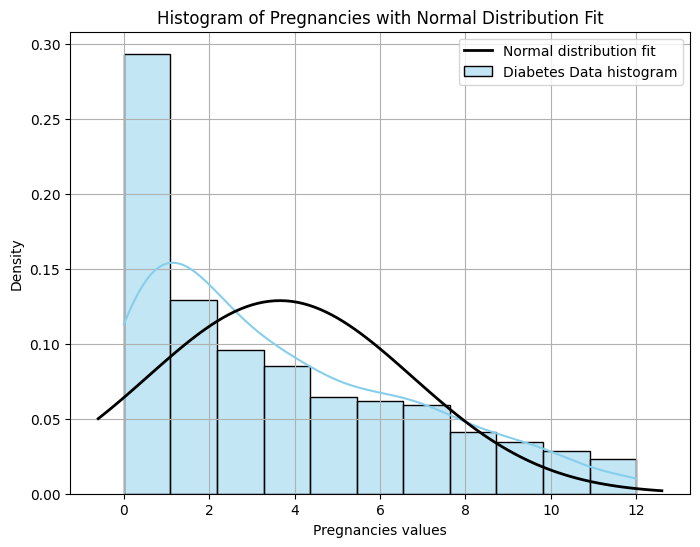

Shapiro-Wilk Test p-value: 8.85881212137063e-12


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


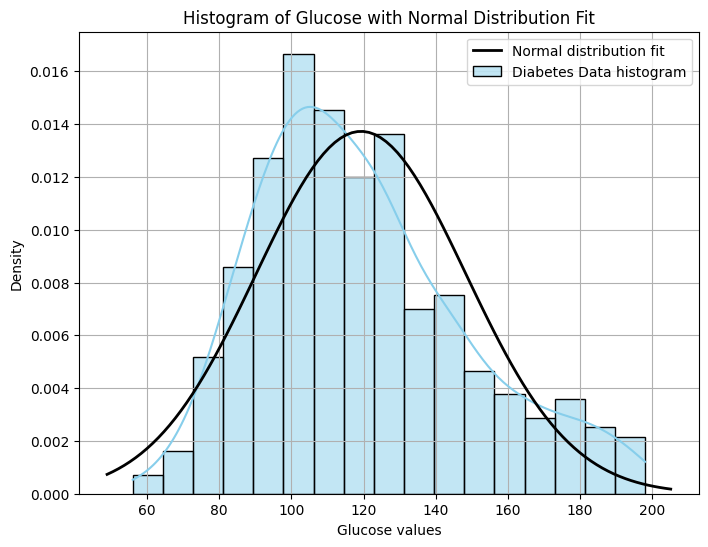

Shapiro-Wilk Test p-value: 0.036555126309394836


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


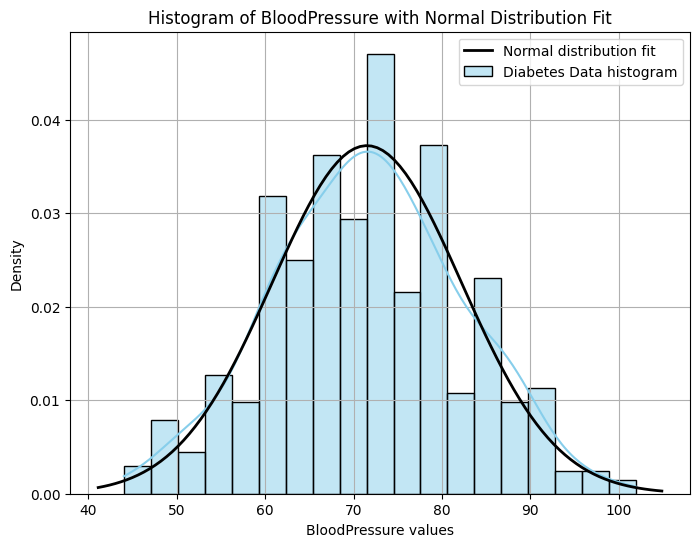

Shapiro-Wilk Test p-value: 0.014068988151848316


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


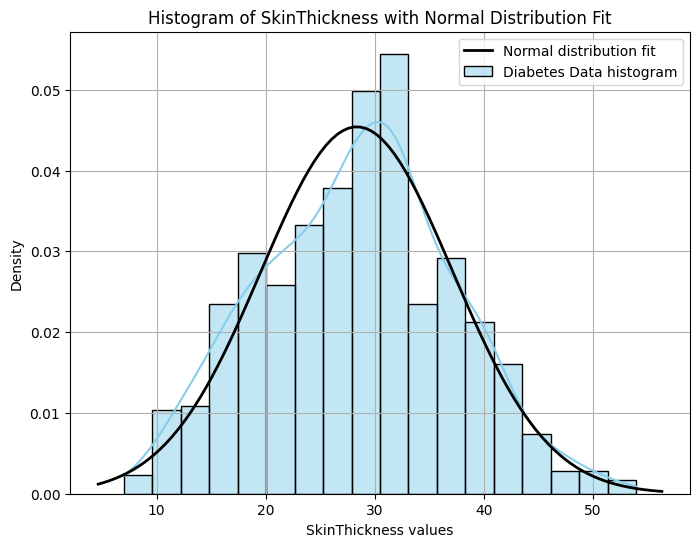

Shapiro-Wilk Test p-value: 9.622708532859618e-17


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


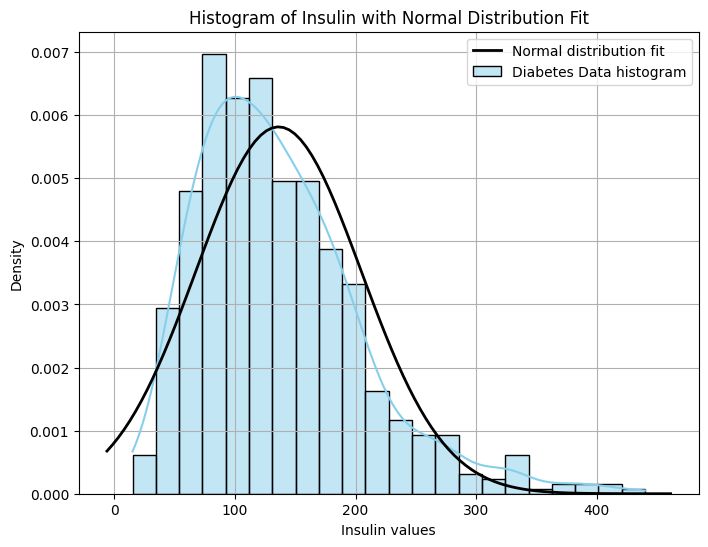

Shapiro-Wilk Test p-value: 0.00014115839439909905


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


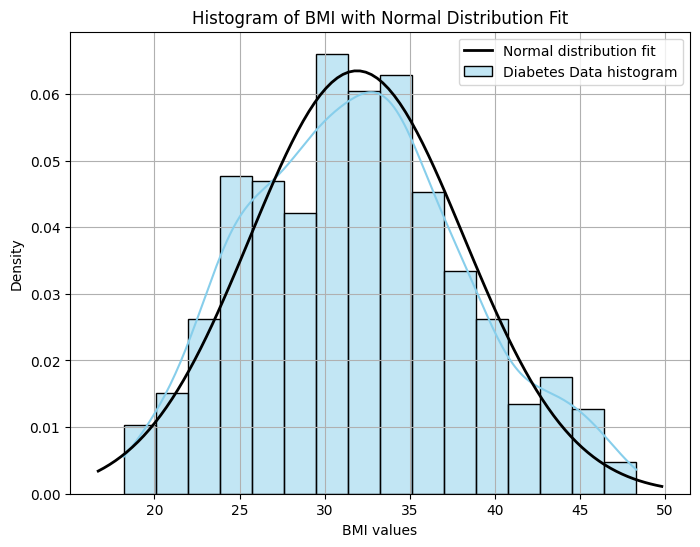

Shapiro-Wilk Test p-value: 3.425868802537636e-19


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


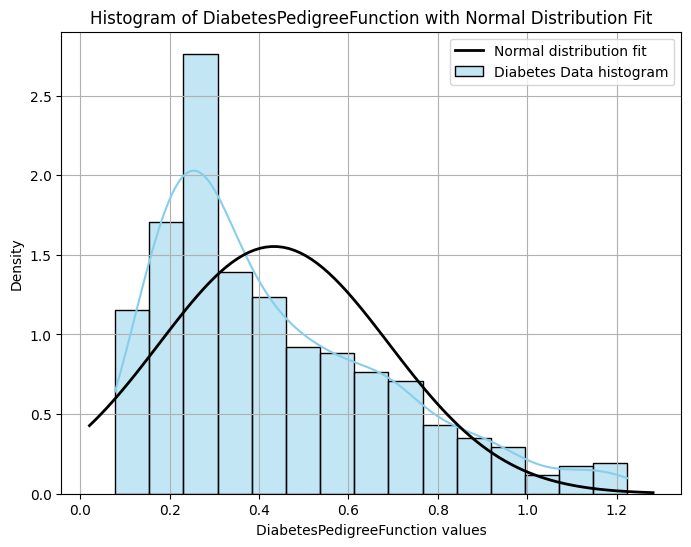

Shapiro-Wilk Test p-value: 2.993296732803851e-22


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


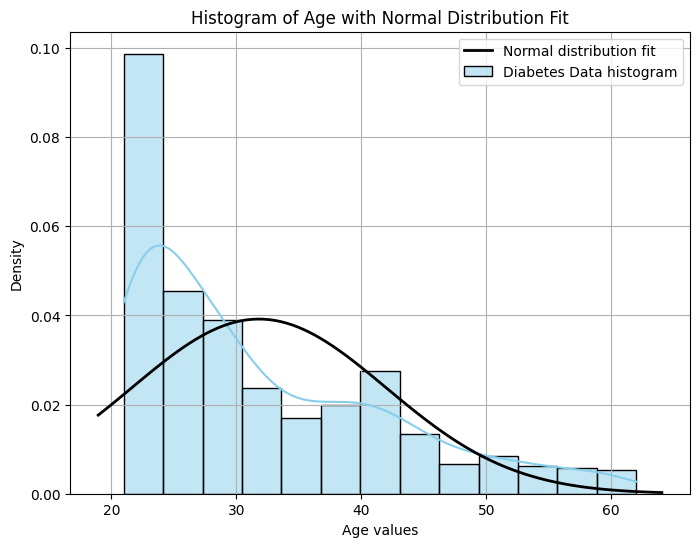

Shapiro-Wilk Test p-value: 6.7050732461555715e-37


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


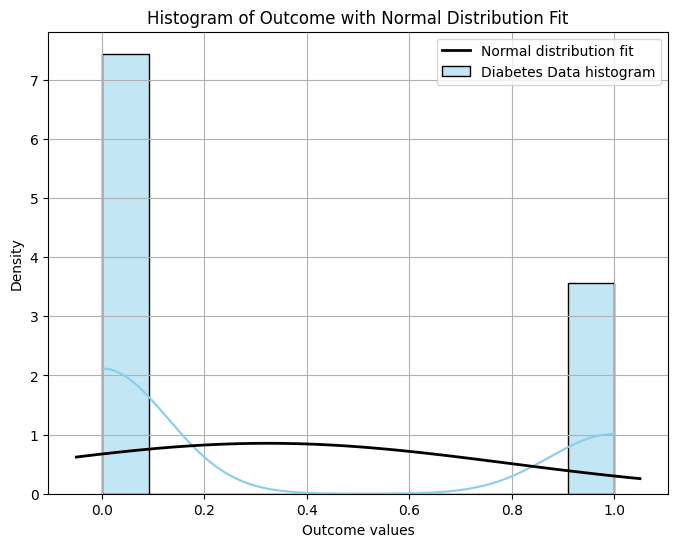

In [2]:
data = data.reset_index(drop=True)

scaler = StandardScaler()
column_names = data.columns
zero_indices = data.eq(0)

# If we have a scaler, then we will normalize our data using the StandardScaler.
if scaler:  
    data = pd.DataFrame(scaler.fit_transform(data), columns = column_names)

# Here we are imputing our NaN data using the KNNImputer
imputer = KNNImputer(n_neighbors = 5)
data = pd.DataFrame(imputer.fit_transform(data), columns = column_names)

# If we have a scaler, we will invert our data back into it's original un-normalized form 
if scaler:
    data = pd.DataFrame(scaler.inverse_transform(data), columns = column_names)

# Handle zero values separately to preserve them
data[zero_indices] = 0
print(data)

num_zeros = (data == 0).sum()
print("%-28s%s" % ("Variable", "Number of 0 values"))
print("%-28s%s" % ("--------", "------------------"))
print(num_zeros)

print()

# This prints the correlation coeffecient that each variable has with the target, which is the diabetes diagnosis
print("%-25s  %s" % ("Variable", "Correlation to Target"))
print("%-25s  %s" % ("--------", "---------------------"))
for i in range(data.shape[1] - 1):
    label = data.columns[i]
    correlation = np.corrcoef(data[label], data["Outcome"])[0, 1]
    print("%-25s  %f" % (label, correlation))

# Plotting Histograms of each column of the data to see the shape of the data and assess its normality
for i in column_names:
    column_data = data[i]  
    
    shapiro_test = stats.shapiro(column_data)
    print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)

    # Plot histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=True, stat='density', color='skyblue', label='Diabetes Data histogram')

    # Overlay normal distribution curve
    mu, std = norm.fit(column_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal distribution fit')

    plt.title(f'Histogram of {i} with Normal Distribution Fit')
    plt.xlabel(f'{i} values')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Convert dataframe into np array
data = np.array(data)
np.random.seed(5)
training_data_ratio = 0.7

# Split the data equally in terms of the proportion of positive and negative diabetes diagnosis
zero_indices = np.where(data[:, 8] == 0)[0]
one_indices = np.where(data[:, 8] == 1)[0]

selected_zero_indices = np.random.choice(zero_indices, int(np.round(zero_indices.shape[0] * training_data_ratio)), replace=False)
selected_one_indices = np.random.choice(one_indices, int(np.round(one_indices.shape[0] * training_data_ratio)), replace=False)

# Concatenate selected samples and subtracted the first selected sample to gather our second selected sample
train_selected_indices = np.concatenate([selected_zero_indices, selected_one_indices])
test_selected_indices = np.delete(np.arange(len(data)), train_selected_indices)

# Extract the selected rows for training data
train_data = data[train_selected_indices]
np.random.shuffle(train_data)

# Extract the selected rows for testing data
test_data = data[test_selected_indices]
np.random.shuffle(test_data)

# Printing out proportions to make sure our testing and training data are fairly seperated
print(f"Training data shape: {train_data.shape}")
print(f"Proportion of 0 diagnosis in training data: {(train_data[:,8]==0).sum() / train_data.shape[0]}")
print(f"Proportion of 1 diagnosis in training data: {(train_data[:,8]==1).sum() / train_data.shape[0]}")
print()

print(f"Testing data shape: {test_data.shape}")
print(f"Proportion of 0 diagnosis in testing data: {(test_data[:,8]==0).sum() / test_data.shape[0]}")
print(f"Proportion of 1 diagnosis in testing data: {(test_data[:,8]==1).sum() / test_data.shape[0]}")

Training data shape: (467, 9)
Proportion of 0 diagnosis in training data: 0.6766595289079229
Proportion of 1 diagnosis in training data: 0.3233404710920771

Testing data shape: (201, 9)
Proportion of 0 diagnosis in testing data: 0.6766169154228856
Proportion of 1 diagnosis in testing data: 0.32338308457711445


In [4]:
# START CODING THE NEURAL NETWORK WOOOOO 

# Input Layer: We have a inital matrix (9 x 300)
    
# First Hidden Layer(6 nodes): activation function is leaky relU 
# (6 x 8)(8 x 508) = (6 x 508)
#   w1       x         z1/a1

# Output Layer: activation function is sigmoid 
# (1 x 6)(6 x 508) = (1 x 508)
#   w2      a1        z2/y_HAT

# Split each data set into inputs and labels
train_data = train_data.T
x_train = train_data[: -1]
y_train = train_data[-1:]

test_data = test_data.T
x_test = test_data[: -1]
y_test = test_data[-1:]

# Initialize our weights and biases for the hidden and output layer 
def init_params():
    w1 = np.random.rand(25, 8) - 0.5
    b1 = np.random.rand(25, 1) - 0.5
    w2 = np.random.rand(1, 25) - 0.5
    b2 = np.random.rand(1, 1) - 0.5
    return w1, b1, w2, b2

# Define our forward propogation function in our feed-forward neural network system
def forward_propogation(x, w1, b1, w2, b2):
    z1 = w1.dot(x) + b1
    a1 = leakyReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Leaky ReLU (Leaky Rectified Linear Unit) as out first activation function, to prevent any vanishing gradient issues 
def leakyReLU(z1):
    return np.maximum((0.01 * z1), z1)

# Sigmoid function for our second activation function (output layer): good for binary classification problems
def sigmoid(z2):
    return 1/(1 + np.exp(-z2)) 

# Derivative of the leaky ReLU activation function. Used for backpropogation
def leakyReLU_deriv(z1):
    return np.where(z1 > 0, 1, 0.01)

In [5]:
# Backward Pass where we calculate the gradients
def backward(z1, a1, w2, x, y_pred, y_train):
    dz2 = (1 / x_train.shape[1]) * (y_pred - y_train) 
    dw2 = np.dot(dz2, a1.T) 
    db2 = np.sum(dz2)
    dz1 = (w2.T).dot(dz2) * leakyReLU_deriv(z1)
    dw1 = dz1.dot(x.T)
    db1 = np.sum(dz1)
    return dw2, db2, dw1, db1

# Update weights and biases for both layers 
def update_params(dw2, db2, dw1, db1, w2, b2, w1, b1, learn_rate):
    w2 -= learn_rate * dw2
    b2 -= learn_rate * db2
    w1 -= learn_rate * dw1
    b1 -= learn_rate * db1
    return w2, b2, w1, b1

In [6]:

loss = []
# We will run our code now 
def runNeuralNetwork(x, y, learn_rate, epochs):
    w1, b1, w2, b2 =  init_params()
    for i in range(epochs):
        z1, a1, z2, a2 = forward_propogation(x, w1, b1, w2, b2)
        dw2, db2, dw1, db1 = backward(z1, a1, w2, x, a2, y)
        w2, b2, w1, b1 = update_params(dw2, db2, dw1, db1, w2, b2, w1, b1, learn_rate)
        loss.append(np.mean(np.square(y_train - a2)))
        if (i % 50 == 0):
            print(f"iteration: {i}")
            print("Accuracy for training data: " + str(np.sum(np.where(a2 >= 0.5, 1, 0) == y_train) / y_train.size))
            #print(np.rec.fromarrays([y_train, np.round(a2)])[0])
            print()
        if (i == epochs - 1):
            print("Final accuracy for training data: " + str(np.sum(np.where(a2 >= 0.5, 1, 0) == y_train) / y_train.size))
    return w1, b1, w2, b2

In [7]:
epochs = 501
w1, b1, w2, b2 = runNeuralNetwork(x_train, y_train, 0.01, epochs)

z1, a1, z2, a2 = forward_propogation(x_test, w1, b1, w2, b2)
print("Accuracy for testing data: " + str(np.sum(np.where(a2 >= 0.5, 1, 0) == y_test) / y_test.size))

iteration: 0
Accuracy for training data: 0.37901498929336186

iteration: 50
Accuracy for training data: 0.7901498929336188

iteration: 100
Accuracy for training data: 0.7965738758029979

iteration: 150
Accuracy for training data: 0.7965738758029979

iteration: 200
Accuracy for training data: 0.7987152034261242

iteration: 250
Accuracy for training data: 0.8051391862955032

iteration: 300
Accuracy for training data: 0.8072805139186295

iteration: 350
Accuracy for training data: 0.8008565310492506

iteration: 400
Accuracy for training data: 0.8072805139186295

iteration: 450
Accuracy for training data: 0.8051391862955032

iteration: 500
Accuracy for training data: 0.8051391862955032

Final accuracy for training data: 0.8051391862955032
Accuracy for testing data: 0.7711442786069652


Text(0.5, 0, 'Epoch')

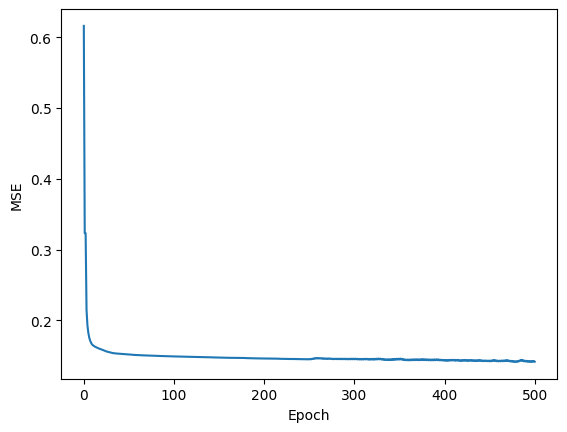

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs), loss)
plt.ylabel("MSE")
plt.xlabel("Epoch")